In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import astropy.io.ascii
tabl=astropy.io.ascii.read('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&format=ascii')

In [3]:
#Using pandas because I understand it:
table=tabl.to_pandas()

### Turning RA/Dec/Distance into 3D coordinates with astropy:

In [5]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [6]:
sc=SkyCoord('17h57m48.49803s +04d41m36.2072s',unit=(u.hourangle, u.deg))

In [8]:
np.sum(np.array(['Barnard' in stname for stname in table.pl_hostname.values]))

0

In [9]:
#Adding barnard's star because it's not in the table yet :P
extrarow=pd.Series({'pl_hostname':"Barnards Star",'pl_letter':'b','pl_name':"Barnards Star b",'pl_discmethod':"Radial Velocity",
                    'st_mass':0.144,'st_rad':0.196,'st_dist':1.8266,'pl_bmassj':3.0,'pl_orbper':240,'pl_orbsmax':0.38358,
                    'ra_str':'17h57m48.49803s','ra':sc.ra.deg,'dec_str':'+04d41m36.2072s','dec':sc.dec.deg},name='3836')

In [10]:
table=table.append(extrarow)

### Taking only nearby stars:

In [11]:
near=table[table.st_dist<20]

In [12]:
allscs=SkyCoord(near.ra,near.dec,distance=near.st_dist,unit=(u.deg,u.deg,u.pc))

In [13]:
near['b']=allscs.galactic.b.deg
near['l']=allscs.galactic.l.deg
near['d']=allscs.galactic.distance

/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [62]:
# Placeholder as I work out the orientation of these 3D coordinates...
#
#3.35170258,  23.67992809,  4.31  ->  3.94036076,  0.230767484,   1.73101227
# ^ towards galactic centre but moderately above.
#90.0626363 , -34.72725534, 15.47 ->  -0.0138994771,  12.7143699e+01,  -8.8128034
# ^ directly east of galactic and below plane
# in-out, left-right, up-down

In [14]:
near['gal_inwards']=allscs.galactic.cartesian.x
near['gal_eastwards']=allscs.galactic.cartesian.y
near['gal_upwards']=allscs.galactic.cartesian.z

/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

For some reason some semi-major axes values are missing, so replacing manually:

In [18]:
near.loc[pd.isnull(near.pl_orbsmax)]

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,...,st_radn,pl_nnotes,rowupdate,pl_facility,b,l,d,gal_inwards,gal_eastwards,gal_upwards
742,GJ 676 A,d,GJ 676 A d,Radial Velocity,4.0,3.60050,0.0002,-0.0002,0.0,2.0,...,3.0,0.0,2016-09-29,La Silla Observatory,-9.542778,339.104005,16.90,15.569998,-5.944357,-2.801749
1374,HD 189733,b,HD 189733 b,Radial Velocity,1.0,2.21858,0.0000,0.0000,0.0,9.0,...,10.0,0.0,2018-04-26,Haute-Provence Observatory,-3.922262,60.963062,19.78,9.578199,17.253286,-1.353010
1856,GJ 676 A,e,GJ 676 A e,Radial Velocity,4.0,35.39000,0.0300,-0.0400,0.0,2.0,...,3.0,0.0,2016-09-29,La Silla Observatory,-9.542778,339.104005,16.90,15.569998,-5.944357,-2.801749
3304,TRAPPIST-1,h,TRAPPIST-1 h,Transit,7.0,18.76700,0.0040,-0.0030,0.0,2.0,...,2.0,0.0,2017-06-15,Multiple Observatories,-56.644264,69.712494,12.10,2.306806,6.240288,-10.106802
3713,HD 26965,b,HD 26965 b,Radial Velocity,1.0,42.37800,0.0100,-0.0100,0.0,1.0,...,4.0,0.0,2018-08-09,Multiple Observatories,-38.047816,200.752769,5.04,-3.711468,-1.406355,-3.106247


Taking colour of the points from the stellar mass, so using `digitize` to bin these:

/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


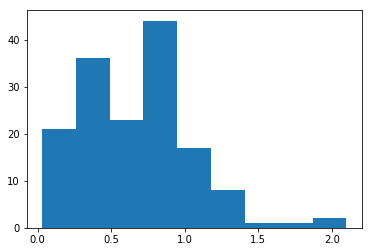

In [21]:
hist=plt.hist(near.st_mass,9)
near['colorbin']=np.digitize(near.st_mass,hist[1])-1

Tidying up the CSV:

In [19]:
near.loc[near.pl_name=='GJ 676 A e','pl_orbsmax']=0.187
near.loc[near.pl_name=='HD 189733 b','pl_orbsmax']=0.03099 
near.loc[near.pl_name=='GJ 676 A d','pl_orbsmax']=0.0413
near.loc[near.pl_name=='TRAPPIST-1 h','pl_orbsmax']=0.063
near.loc[near.pl_name=='HD 26965 b','pl_orbsmax']=0.224

/Users/hosborn/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
[strname for strname in near.pl_hostname if len(strname)>12]

['VHS J125601.92-125723.9', 'WISEP J121756.91+162640.2 A', 'Barnards Star']

In [24]:
near.loc[near.pl_name=='VHS J125601.92-125723.9','pl_hostname']='VHS J1256'
near.loc[near.pl_name=='WISEP J121756.91+162640.2 A','pl_hostname']='WISEP J1217'
near.loc[near.pl_name=='VHS J125601.92-125723.9','pl_name']='VHS J1256 b'
near.loc[near.pl_name=='WISEP J121756.91+162640.2 A','pl_name']='WISEP J1217 b'

/Users/hosborn/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
near.loc[pd.isnull(near.st_rad),'st_rad']=near.loc[pd.isnull(near.st_rad),'st_mass'].values**0.85

/Users/hosborn/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
near.to_csv('Nearest_planetary_systems_edited.csv')

In [28]:
import pandas as pd
import numpy as np
near=pd.DataFrame.from_csv('Nearest_planetary_systems_edited.csv')

/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


Colour indexes (in sns "muted") for the detection methods:

In [34]:
disc_met_index={'Radial Velocity':0, 'Transit':3, 'Imaging':2}

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import seaborn as sns
sns.set_style('white')
sns.set(rc={'axes.facecolor':'#f4ecdc', 'figure.facecolor':'#ffffff'})
#sns.set(rc={'axes.facecolor':'#ffffff', 'figure.facecolor':'#ffffff'})
sns.set_palette("Spectral", 10)

#### Plotting:

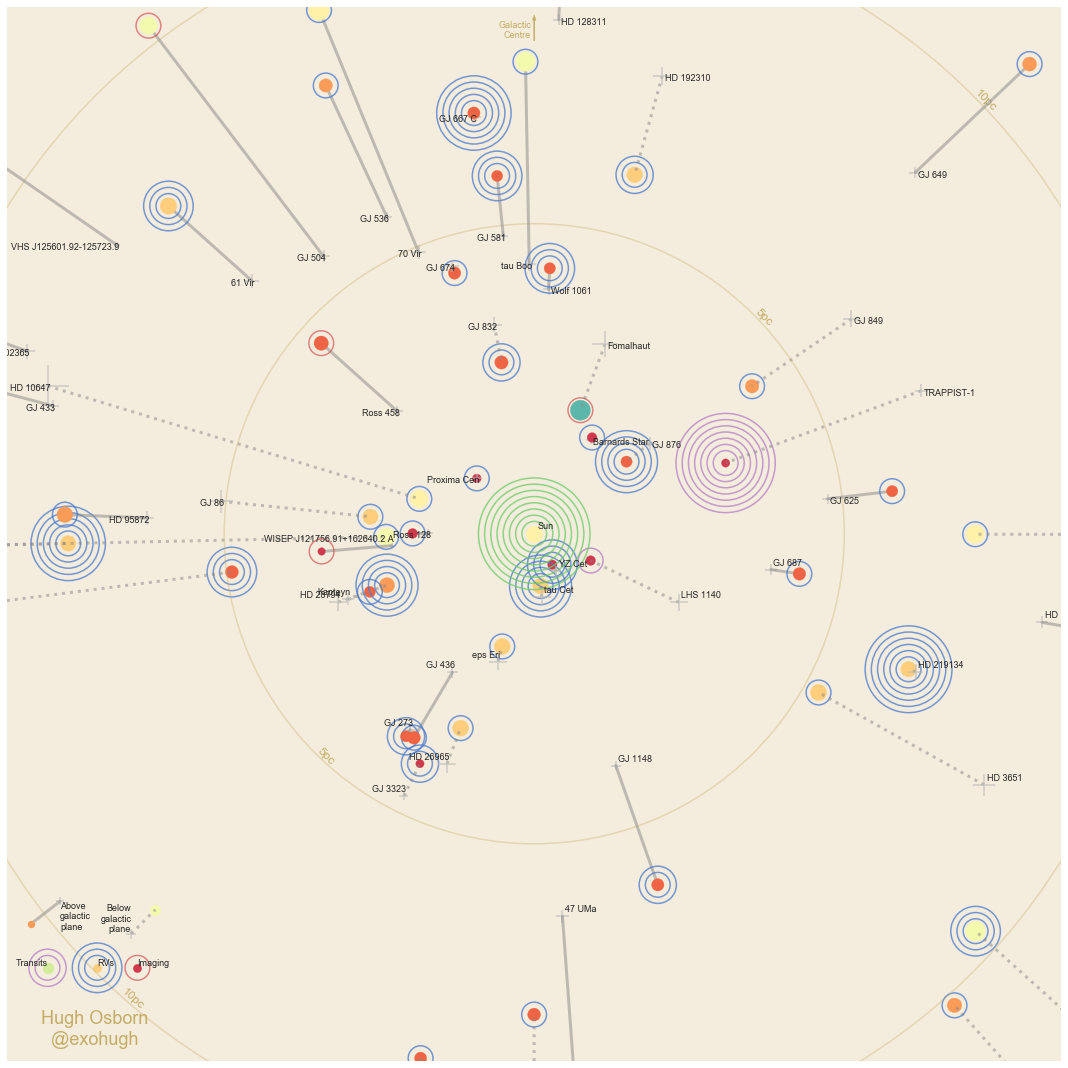

In [35]:
#sns.set(rc={'axes.facecolor':'#f4ecdc', 'figure.facecolor':'#ffffff'})
plotsize=8.5
vert_scale=0.05

def smascale(sma):
    return 0.85*sma**0.25

def radscale(rad):
    return 280*rad**0.66

fig,ax1 = plt.subplots(1,figsize=(15,15))

ax1.set_xlim(-1*plotsize,plotsize)
ax1.set_ylim(-1*plotsize,plotsize)
#bbox = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#pix_per_pc_x, pix_per_pc_y = (bbox.width*fig.dpi)/(2*plotsize), (bbox.height*fig.dpi)/(2*plotsize)

finalx=[];finaly=[];finals=[];cols=[];circles=[];names=[];initx=[];inity=[];finals_proj=[]
#Looping over each star
for starname in pd.unique(near.loc[(near.gal_eastwards**2+near.gal_inwards**2)<(plotsize*1.5)**2].pl_hostname):
    star=near.loc[near.pl_hostname==starname].iloc[0]
    dash_gs=vert_scale*np.hypot(star.gal_eastwards,star.gal_inwards)
    zmult=1+vert_scale*star.gal_upwards
    #print(int(np.round(dash_gs)), int(np.round(2*dash_gs)))
    ls=':' if star.gal_upwards<0 else '-'
    dashorder=-1 if star.gal_upwards<0 else 1
    #Plotting dashed/solid lines from 2D position to 3D
    ax1.plot([star.gal_eastwards,star.gal_eastwards*zmult],[star.gal_inwards,star.gal_inwards*zmult],
             linestyle=ls,zorder=dashorder,alpha=0.5,color='#888888',linewidth=3)
    initx+=[star.gal_eastwards]
    inity+=[star.gal_inwards]
    finalx+=[star.gal_eastwards*zmult]
    finaly+=[star.gal_inwards*zmult]
    finals+=[radscale(star.st_rad)]
    finals_proj+=[finals[-1]/zmult**1.25]
    cols+=[sns.color_palette('Spectral',10)[star['colorbin']]]
    names+=[starname]
    npl=0
    #Plotting circles for each planet
    for name,pl in near.loc[near.pl_hostname==starname].iterrows():
        circles+=[plt.Circle((finalx[-1], finaly[-1]), 0.1*(npl+2),
                             color=sns.color_palette('muted')[disc_met_index[pl['pl_discmethod']]],
                             fill=False,alpha=0.75,zorder=dashorder*3,linewidth=1.5)]
        npl+=1
    #ax1.text(finalx[-1]+0.25*(npl),finaly[-1]+0.15*(npl),starname,fontsize=9, clip_on=True)
    hal='right' if initx[-1]<0.0 else 'left'
    val='bottom' if inity[-1]<0.0 or '28794' in starname else 'top'
    #Plotting the text for the starname
    ax1.text(initx[-1]+0.04,inity[-1]+0.04,starname,fontsize=9, clip_on=True,
             horizontalalignment=hal,verticalalignment=val,zorder=4)

#print(pl['pl_orbsmax'],pix_per_pc_x,pix_per_pc_y)
#print(finalx[-1]+(5+smascale(pl['pl_orbsmax'])/pix_per_pc_x),finaly[-1]+(5+smascale(pl['pl_orbsmax'])/pix_per_pc_y),starname)
#ax1.text(finalx[-1]+(5+smascale(np.max(near.loc[near.pl_hostname==starname,'pl_orbsmax'])))/pix_per_pc_x,finaly[-1]+(5+smascale(np.max(star['pl_orbsmax'])))/pix_per_pc_y,starname,fontsize=9)
#ax1.scatter(near.loc[near.gal_upwards<0.0,'gal_eastwards'].values,near.loc[near.gal_upwards<0.0,'gal_inwards'].values,zorder=2)

#Plotting the stars and the star "shadows" on the 2D plane

below=np.array(finals_proj)<np.array(finals)
ax1.scatter(np.array(finalx)[below],np.array(finaly)[below],s=np.array(finals)[below],zorder=4,c=np.array(cols)[below])
ax1.scatter(np.array(finalx)[~below],np.array(finaly)[~below],s=np.array(finals)[~below],zorder=-4,c=np.array(cols)[~below])
ax1.scatter(np.array(initx)[below],np.array(inity)[below],s=np.array(finals_proj)[below],c='#BBBBBB',facecolor=None,zorder=-3,alpha=0.6,marker='+')
ax1.scatter(np.array(initx)[~below],np.array(inity)[~below],s=np.array(finals_proj)[~below],c='#BBBBBB',facecolor=None,zorder=3,alpha=0.6,marker='+')


#Plotting the Sun!
for npl,sma in enumerate([0.387,0.723,1.000,1.524,5.20,9.54,19.19,30.1]):
    circles+=[plt.Circle((0,0), 0.1*(npl+2),
                         color=sns.color_palette('muted')[1],
                         fill=False,alpha=0.75,zorder=0,linewidth=1.5)]
ax1.text(0.05,0.05,'Sun',fontsize=9, clip_on=True,horizontalalignment='left',verticalalignment='bottom',zorder=4)
ax1.scatter(0.0,0.0,s=radscale(1.0),zorder=2,c=sns.color_palette('Spectral',10)[4])

#Plotting 5, 10 and 15 parsec circles:
circles+=[plt.Circle((0, 0), 5, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]
circles+=[plt.Circle((0, 0), 10, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]
circles+=[plt.Circle((0, 0), 15, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]

ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.grid(False)

for circ in circles:
    ax1.add_artist(circ)
    
#Adding labels to those 1/15/15pc circles:
ax1.text(5/np.sqrt(2),5/np.sqrt(2),'5pc',rotation=-45,color=sns.color_palette('muted')[4],zorder=0)
ax1.text(10/np.sqrt(2),10/np.sqrt(2),'10pc',rotation=-45,color=sns.color_palette('muted')[4],zorder=0)
ax1.text(-5/np.sqrt(2),-5/np.sqrt(2),'5pc',rotation=-45,color=sns.color_palette('muted')[4],zorder=0)
ax1.text(10*np.cos(228/180*np.pi),10*np.sin(228/180*np.pi),'10pc',rotation=-42,color=sns.color_palette('muted')[4],zorder=0)

#Adding Signature
ax1.text(-11.25/np.sqrt(2),-11.65/np.sqrt(2),'Hugh Osborn\n  @exohugh',color=sns.color_palette('muted')[4],zorder=-6,fontsize=18)

#Adding arrow to galactic centre:
plt.arrow(0,7.95,0.0,0.33,width=0.02,color=sns.color_palette('muted')[4],zorder=-6)
ax1.text(-0.05,8.0,'Galactic\nCentre',color=sns.color_palette('muted')[4],zorder=-6,fontsize=9,horizontalalignment='right')


#Doing Legend myself:
ax1.plot([-7.65,-7.65*1.06],[-5.93,-5.93*1.06],
         linestyle='-',zorder=1,alpha=0.5,color='#888888',linewidth=3)
ax1.scatter(-7.65,-5.93,s=60,marker='+',zorder=0,c='#BBBBBB',alpha=0.6,)
ax1.scatter(-7.65*1.06,-5.93*1.06,s=60/1.2,c=sns.color_palette('Spectral',10)[2],zorder=2)
ax1.text(-7.65,-5.93,"Above\ngalactic\nplane",fontsize=9, clip_on=True,horizontalalignment='left',verticalalignment='top',zorder=4)

ax1.plot([-6.5,-6.5*0.94],[-6.45,-6.45*0.94],
         linestyle=':',zorder=1,alpha=0.5,color='#888888',linewidth=3)
ax1.scatter(-6.5,-6.45,s=90,marker='+',zorder=0,c='#BBBBBB',alpha=0.6,)
ax1.scatter(-6.5*0.94,-6.45*0.94,s=90*1.2,c=sns.color_palette('Spectral',10)[5],zorder=-2)
ax1.text(-6.5,-6.45,"Below\ngalactic\nplane",fontsize=9, clip_on=True,horizontalalignment='right',verticalalignment='bottom',zorder=4)

#Doing "planet detection method" legend:
legendcircles=[]
ax1.scatter(-7.85,-7,s=120,c=sns.color_palette('Spectral',10)[6],zorder=0)
for npl in range(2):
    legendcircles+=[plt.Circle((-7.85,-7), 0.1*(npl+2),
                     color=sns.color_palette('muted')[3],
                     fill=False,alpha=0.75,zorder=0,linewidth=1.5)]
ax1.text(-7.85,-7,'Transits',fontsize=9, clip_on=True,horizontalalignment='right',verticalalignment='bottom',zorder=4)

ax1.scatter(-7.05,-7,s=70,c=sns.color_palette('Spectral',10)[3],zorder=0)
for npl in range(3):
    legendcircles+=[plt.Circle((-7.05,-7), 0.1*(npl+2),
                     color=sns.color_palette('muted')[0],
                     fill=False,alpha=0.75,zorder=0,linewidth=1.5)]
ax1.text(-7.05,-7,'RVs',fontsize=9, clip_on=True,horizontalalignment='left',verticalalignment='bottom',zorder=4)

ax1.scatter(-6.4,-7,s=70,c=sns.color_palette('Spectral',10)[0],zorder=0)
for npl in range(1):
    legendcircles+=[plt.Circle((-6.4,-7), 0.1*(npl+2),
                     color=sns.color_palette('muted')[2],
                     fill=False,alpha=0.75,zorder=0,linewidth=1.5)]
ax1.text(-6.4,-7,'Imaging',fontsize=9, clip_on=True,horizontalalignment='left',verticalalignment='bottom',zorder=4)

for circ in legendcircles:
    ax1.add_artist(circ)

#Removing whitespace
fig.tight_layout()

#Saving
plt.savefig("AllNearbyPlanets_small.png",dpi=200)
plt.savefig("AllNearbyPlanets.png",dpi=600)

# Business card stuff:

I'm gonna maybe put this design on a business card with "above" planets on one side and "below" planets on the other...

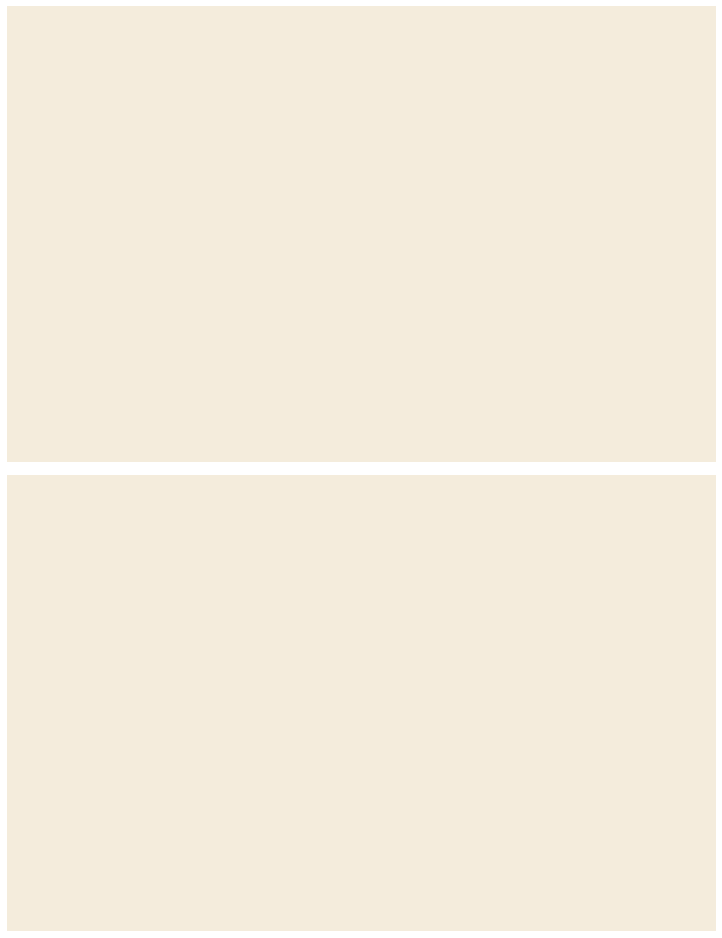

In [10]:
sns.set(rc={'axes.facecolor':'#f4ecdc', 'figure.facecolor':'#ffffff'})
fig, (ax1,ax2) = plt.subplots(2,figsize=(8.5*1.2,2*5.5*1.2))
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.grid(False)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.grid(False)

fig.tight_layout()

plt.savefig("BusinessCardColourBG_55x85.png",dpi=500)

/Users/hosborn/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


[260.62304250487665, 69.09039151869673, 229.22291536481526, 237.65145037577423, 178.89996333917284, 184.15355421592957, 126.49054373799932, 252.2091515640883, 403.7290693353107, 235.63614547648328, 247.0537862160765, 76.48962555401974, 165.30206937696406, 155.37466462258794, 123.69174315334506, 69.09039151869673, 93.56973682343609, 147.8479152613968, 210.23299764037978, 255.41167080302708, 243.56961152085353, 86.94694347376016]


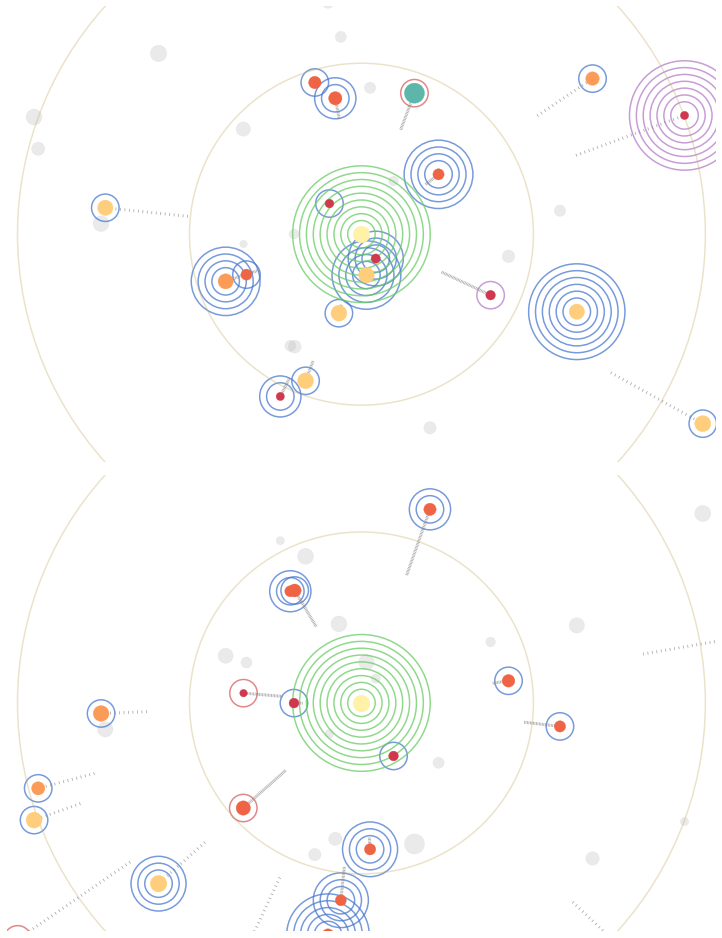

In [36]:
sns.set(rc={'axes.facecolor':'#ffffff', 'figure.facecolor':'#ffffff'})
plotsize=10.3
vert_scale=0.05

def smascale(sma):
    return 0.85*sma**0.25

def radscale(rad):
    return 280*rad**0.66

fig, (ax1,ax2) = plt.subplots(2,figsize=(8.5*1.2,2*5.5*1.2))

ax1.set_xlim(-1*plotsize,plotsize)
ax1.set_ylim(-1*plotsize*55/85.0,plotsize*55/85.0)
bbox = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
pix_per_pc_x, pix_per_pc_y = (bbox.width*fig.dpi)/(2*plotsize), (bbox.height*fig.dpi)/(2*plotsize/np.sqrt(2))

finalx=[];finaly=[];finals=[];cols=[];circles=[];names=[]
for starname in pd.unique(near.loc[(near.gal_upwards<0.0)*(near.st_dist<plotsize*1.25)].pl_hostname):
    star=near.loc[near.pl_hostname==starname].iloc[0]
    dash_gs=vert_scale*np.hypot(star.gal_eastwards,star.gal_inwards)
    zmult=1+vert_scale*abs(star.gal_upwards)
    #print(int(np.round(dash_gs)), int(np.round(2*dash_gs)))
    ax1.plot([star.gal_eastwards,star.gal_eastwards*zmult],[star.gal_inwards,star.gal_inwards*zmult],
             linestyle=':', dashes=(0.25+int(np.round(dash_gs)), 0.25+int(np.round(2*dash_gs))),
             zorder=1,alpha=0.75,color='#888888',linewidth=3)

    finalx+=[star.gal_eastwards*zmult]
    finaly+=[star.gal_inwards*zmult]
    finals+=[radscale(star.st_rad)]
    cols+=[sns.color_palette('Spectral',10)[star['colorbin']]]
    names+=[starname]
    npl=0
    for name,pl in near.loc[near.pl_hostname==starname].iterrows():
        circles+=[plt.Circle((finalx[-1], finaly[-1]), 0.2*(npl+2),
                             color=sns.color_palette('muted')[disc_met_index[pl['pl_discmethod']]],
                             fill=False,alpha=0.75,zorder=0,linewidth=1.5)]
        npl+=1
    #ax1.text(finalx[-1]+0.25*(npl),finaly[-1]+0.15*(npl),starname,fontsize=9)
#print(pl['pl_orbsmax'],pix_per_pc_x,pix_per_pc_y)
#print(finalx[-1]+(5+smascale(pl['pl_orbsmax'])/pix_per_pc_x),finaly[-1]+(5+smascale(pl['pl_orbsmax'])/pix_per_pc_y),starname)
#ax1.text(finalx[-1]+(5+smascale(np.max(near.loc[near.pl_hostname==starname,'pl_orbsmax'])))/pix_per_pc_x,finaly[-1]+(5+smascale(np.max(star['pl_orbsmax'])))/pix_per_pc_y,starname,fontsize=9)
#ax1.scatter(near.loc[near.gal_upwards<0.0,'gal_eastwards'].values,near.loc[near.gal_upwards<0.0,'gal_inwards'].values,zorder=2)
ax1.scatter(finalx,finaly,s=finals,zorder=2,c=cols)

#Plotting the Sun!
for npl,sma in enumerate([0.387,0.723,1.000,1.524,5.20,9.54,19.19,30.1,39.5]):
    circles+=[plt.Circle((0,0), 0.2*(npl+2),
                         color=sns.color_palette('muted')[1],
                         fill=False,alpha=0.75,zorder=0,linewidth=1.5)]
ax1.scatter(0.0,0.0,s=radscale(1.0),zorder=2,c=sns.color_palette('Spectral',10)[4])

circles+=[plt.Circle((0, 0), 5, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]
circles+=[plt.Circle((0, 0), 10, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]
circles+=[plt.Circle((0, 0), 15, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]

ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.grid(False)

for circ in circles:
    ax1.add_artist(circ)



finalx2=[];finaly2=[];finals2=[];cols2=[];circles2=[];names2=[]
for starname in pd.unique(near.loc[(near.gal_upwards>=0.0)*(near.st_dist<plotsize*1.25)].pl_hostname):
    star=near.loc[near.pl_hostname==starname].iloc[0]
    dash_gs=vert_scale*np.hypot(star.gal_eastwards,star.gal_inwards)
    zmult=1+vert_scale*abs(star.gal_upwards)
    #print(int(np.round(dash_gs)), int(np.round(2*dash_gs)))
    ax2.plot([star.gal_eastwards,star.gal_eastwards*zmult],[-1*star.gal_inwards,-1*star.gal_inwards*zmult],
             linestyle=':', dashes=(0.25+int(np.round(dash_gs)), 0.25+int(np.round(2*dash_gs))),
             zorder=1,alpha=0.75,color='#888888',linewidth=3)

    finalx2+=[star.gal_eastwards*zmult]
    finaly2+=[-1*star.gal_inwards*zmult]
    finals2+=[radscale(star.st_rad)]
    cols2+=[sns.color_palette('Spectral',10)[star['colorbin']]]
    names2+=[starname]
    
    npl=0
    for name,pl in near.loc[near.pl_hostname==starname].iterrows():
        circles2+=[plt.Circle((finalx2[-1], finaly2[-1]), 0.2*(npl+2),
                             color=sns.color_palette('muted')[disc_met_index[pl['pl_discmethod']]],
                             fill=False,alpha=0.75,zorder=0,linewidth=1.5)]
        npl+=1
        #print(pl.pl_name,star.gal_eastwards*zmult,star.gal_inwards*zmult,star.gal_upwards,smascale(pl['pl_orbsmax']),sns.color_palette('Spectral',10)[star['colorbin']],sns.color_palette('muted')[disc_met_index[pl['pl_discmethod']]])
    #ax2.text(finalx2[-1]+0.25*(npl),finaly2[-1]+0.15*(npl),starname,fontsize=9)
#ax2.text(finalx2[-1]+(5+smascale(np.max(near.loc[near.pl_hostname==starname,'pl_orbsmax'])))/pix_per_pc_x,finaly2[-1]+(5+smascale(np.max(star['pl_orbsmax'])))/pix_per_pc_y,starname,fontsize=9)
#ax2.scatter(near.loc[near.gal_upwards<0.0,'gal_eastwards'].values,near.loc[near.gal_upwards<0.0,'gal_inwards'].values,zorder=2)
ax2.scatter(finalx2,finaly2,s=finals2,zorder=2,c=cols2)
ax2.scatter(finalx,-1*np.array(finaly),s=finals,c='#BBBBBB',facecolors='none',zorder=-1,alpha=0.3)
ax1.scatter(finalx2,-1*np.array(finaly2),s=finals2,c='#BBBBBB',facecolors='none',zorder=-1,alpha=0.3)

print(finals)

#Plotting the Sun!
for npl,sma in enumerate([0.387,0.723,1.000,1.524,5.20,9.54,19.19,30.1,39.5]):
    circles2+=[plt.Circle((0,0), 0.2*(npl+2),
                         color=sns.color_palette('muted')[1],
                         fill=False,alpha=0.75,zorder=0,linewidth=1.5)]
ax2.scatter(0.0,0.0,s=radscale(1.0),zorder=2,c=sns.color_palette('Spectral',10)[4])

circles2+=[plt.Circle((0, 0), 5, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]
circles2+=[plt.Circle((0, 0), 10, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]
circles2+=[plt.Circle((0, 0), 15, color=sns.color_palette('muted')[4],fill=False,alpha=0.35,zorder=0,linewidth=1.5)]

ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.grid(False)

for circ in circles2:
    ax2.add_artist(circ)

ax2.set_xlim(-1*plotsize,plotsize)
ax2.set_ylim(-1*plotsize*55/85.0,plotsize*55/85.0)

fig.tight_layout()

plt.savefig("BusinessCardDesigns_55x85.png",dpi=500)

# Ignore everything from here on out - it's just the wasteland:

In [43]:
ax1.arrow?

In [39]:
near.loc[near.pl_hostname=='YZ Cet']

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,...,pl_nnotes,rowupdate,pl_facility,b,l,d,gal_inwards,gal_eastwards,gal_upwards,colorbin
3327,YZ Cet,b,YZ Cet b,Radial Velocity,3.0,1.96876,0.00021,-0.00021,0.0,1.0,...,0.0,2017-08-24,La Silla Observatory,-78.759673,149.705273,3.6,-0.605902,0.353986,-3.530946,0
3328,YZ Cet,c,YZ Cet c,Radial Velocity,3.0,3.06008,0.00022,-0.00022,0.0,1.0,...,0.0,2017-08-24,La Silla Observatory,-78.759673,149.705273,3.6,-0.605902,0.353986,-3.530946,0
3329,YZ Cet,d,YZ Cet d,Radial Velocity,3.0,4.65627,0.00042,-0.00042,0.0,1.0,...,0.0,2017-08-24,La Silla Observatory,-78.759673,149.705273,3.6,-0.605902,0.353986,-3.530946,0


In [41]:
near.loc[near.pl_hostname=='Proxima Cen']

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,...,pl_nnotes,rowupdate,pl_facility,b,l,d,gal_inwards,gal_eastwards,gal_upwards,colorbin
3187,Proxima Cen,b,Proxima Cen b,Radial Velocity,1.0,11.186,0.001,-0.002,0.0,1.0,...,0.0,2016-08-25,European Southern Observatory,-1.927146,313.939869,1.29,0.894629,-0.928363,-0.043381,0


In [196]:
finalx[2],finaly[2]

(-14.814432724872365, -0.3066281443191794)

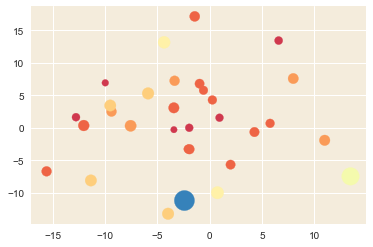

In [192]:
plt.scatter(finalx2,finaly2,s=finals2,zorder=2,c=cols2)

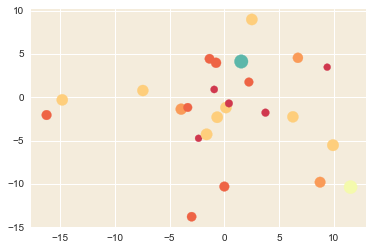

In [194]:
plt.scatter(finalx,finaly,s=finals,zorder=2,c=cols)

In [175]:
cols

[(0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.3600153787004998, 0.7161860822760476, 0.6655132641291811),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.8141484044598232, 0.2196847366397539, 0.3

In [171]:
near.loc[near.pl_hostname=="GJ 1214"].iloc[0]

pl_hostname               GJ 1214
pl_letter                       b
pl_name                 GJ 1214 b
pl_discmethod             Transit
pl_pnum                         1
pl_orbper                  1.5804
pl_orbpererr1             1.6e-07
pl_orbpererr2            -1.6e-07
pl_orbperlim                    0
pl_orbpern                     13
pl_orbsmax                0.01411
pl_orbsmaxerr1            0.00032
pl_orbsmaxerr2           -0.00032
pl_orbsmaxlim                   0
pl_orbsmaxn                     1
pl_orbeccen                   NaN
pl_orbeccenerr1               NaN
pl_orbeccenerr2               NaN
pl_orbeccenlim                NaN
pl_orbeccenn                    3
pl_orbincl                  88.17
pl_orbinclerr1               0.54
pl_orbinclerr2              -0.54
pl_orbincllim                   0
pl_orbincln                    11
pl_bmassj                  0.0197
pl_bmassjerr1              0.0027
pl_bmassjerr2             -0.0027
pl_bmassjlim                    0
pl_bmassn     

In [138]:
near.loc[pd.isnull(near.pl_orbsmax),'pl_name']

168       GJ 676 A d
413      HD 189733 b
2910    TRAPPIST-1 h
3192      GJ 676 A e
3765      HD 26965 b
Name: pl_name, dtype: object

In [137]:
near.columns

Index(['pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod', 'pl_pnum',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbpern', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_orbsmaxlim', 'pl_orbsmaxn', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbeccenn', 'pl_orbincl',
       'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_orbincln',
       'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
       'pl_bmassn', 'pl_bmassprov', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_radn', 'pl_dens', 'pl_denserr1', 'pl_denserr2',
       'pl_denslim', 'pl_densn', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag',
       'ra_str', 'dec_str', 'ra', 'st_raerr', 'dec', 'st_decerr', 'st_posn',
       'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim', 'st_distn',
       'st_optmag', 'st_optmagerr', 'st_optmaglim', 'st_optband', 'gaia_gmag',
       'gaia_gmagerr', 'gaia_gmaglim', 

array([ 4,  2,  2,  5,  3,  3,  4,  3,  3,  3, 10,  0,  4,  1,  1,  1,  1,
        2,  2,  1,  1,  2,  1,  1,  1,  1,  3,  3,  2,  2,  2,  1,  1,  2,
        4,  3,  3,  5,  3,  4,  4,  3,  3,  7,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  6,  6,  9,  8,  3,  6,  3,  6,  6,  0,  0,  0,  1,
        1,  1,  4,  2,  3,  3,  3,  0,  3,  3,  3,  3,  2,  3,  3,  3,  1,
        4,  4,  5,  5,  5,  3,  1,  6,  2,  2,  1,  2,  2,  1,  3,  2,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  4,  5,  4,  4,  4,  5,  1,  1,
        1,  2,  1,  4,  4,  2,  3,  5,  2,  2,  0,  3,  3,  1,  1,  0,  2,
        5,  3,  3,  3,  3,  3,  0,  0,  0,  1,  1,  0,  4,  2,  3,  0,  0])

In [32]:
mass_hist

(array([21., 29., 22., 35., 25., 11.,  6.,  1.,  1.,  2.]),
 array([0.03 , 0.237, 0.444, 0.651, 0.858, 1.065, 1.272, 1.479, 1.686,
        1.893, 2.1  ]),
 <a list of 10 Patch objects>)

In [ ]:
0.210*1.8266

In [ ]:
table.dec_str

In [ ]:
Table.